In [97]:
import math

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Отображение 9 знаков после запятой в итоговой таблице
pd.set_option('display.float_format', lambda x: '%.9f' % x)

In [98]:
# Входные данные
INTERVAL_START = 2  # a0
INTERVAL_END = 200  # b0
TOLERANCE = 0.00001  # точность

In [99]:
# Исходная функция
def f(x):
    return (x - 15) ** 2 + 5

In [100]:
SQRT_5 = math.sqrt(5)  # константный корень из 5 (чтобы не вычислять каждый раз)

# n-ное число Фибоначчи (формула Бинэ с округлением)
def fib(n) -> int:
    raw = 1 / SQRT_5 * (((1 + SQRT_5) / 2) ** n - ((1 - SQRT_5) / 2) ** n)
    return round(raw)

In [101]:
# Первые 10 чисел Фибоначчи
[fib(i) for i in range(1, 11)]

[1, 1, 2, 3, 5, 8, 13, 21, 34, 55]

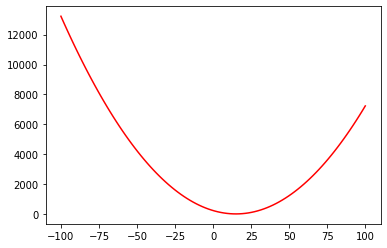

In [102]:
# График исходной функции
space = np.linspace(-100, 100, 100)
func = f(space)

fig = plt.figure()
plt.plot(space, func, 'r')

In [103]:
# Выбор n
n = 1
while fib(n + 2) <= (INTERVAL_END - INTERVAL_START) / TOLERANCE:
    n += 1

n

26

In [104]:
# Точки на начальном интервале
x1 = INTERVAL_START + (fib(n) / fib(n + 2)) * (INTERVAL_END - INTERVAL_START)
x2 = INTERVAL_START + (fib(n + 1) / fib(n + 2)) * (INTERVAL_END - INTERVAL_START)

# Значения функции в этих точках
y1 = f(x1)
y2 = f(x2)
((x1, y1), (x2, y2))

((77.62927022664414, 3927.425489122014),
 (124.37072977335588, 11966.956531156433))

In [105]:
current_start = INTERVAL_START
current_end = INTERVAL_END

# Поиск минимума
while n > 1:
    n -= 1

    if y1 > y2:
        # Сдвиг "вправо"
        current_start = x1
        x1 = x2
        x2 = current_end - (x1 - current_start)
        y1 = y2
        y2 = f(x2)
    else:
        # Сдвиг "влево"
        current_end = x2
        x2 = x1
        x1 = current_start + (current_end - x2)
        y2 = y1
        y1 = f(x1)
x_extr = (x1 + x2) / 2

(x_extr, f(x_extr))

(14.999764011299327, 5.000000055690667)

In [131]:
# Весь алгоритм в одной функции
def fib_extr(start, end, tolerance):
    stats = pd.DataFrame(columns=['Номер итерации', 'A', 'B', 'Длина интервала', 'Точка', 'Значение функции'])
    stats.set_index('Номер итерации', inplace=True)

    n = 1
    while fib(n + 2) <= (end - start) / tolerance:
        n += 1
    
    iterations = n - 1
    
    x1 = start + (fib(n) / fib(n + 2)) * (end - start)
    x2 = start + (fib(n + 1) / fib(n + 2)) * (end - start)

    y1 = f(x1)
    y2 = f(x2)

    current_start = start
    current_end = end

    current_iter = 0
    stats.loc[current_iter] = [current_start, current_end, current_end - current_start, (x1 + x2) / 2, f((x1 + x2) / 2)]
    while n > 1:
        current_iter += 1
        n -= 1

        if y1 > y2:
            current_start = x1
            x1 = x2
            x2 = current_end - (x1 - current_start)
            y1 = y2
            y2 = f(x2)
        else:
            current_end = x2
            x2 = x1
            x1 = current_start + (current_end - x2)
            y2 = y1
            y1 = f(x1)
        x_extr = (x1 + x2) / 2
        stats.loc[current_iter] = [current_start, current_end, current_end - current_start, x_extr, f(x_extr)]

    return stats, iterations

In [111]:
fib_extr(INTERVAL_START, INTERVAL_END, TOLERANCE)

A             B  Длина интервала         Точка  \
Номер итерации                                                             
0               2.000000000 200.000000000    198.000000000 101.000000000   
1               2.000000000 124.370729773    122.370729773  63.185364887   
2               2.000000000  77.629270227     75.629270227  39.814635113   
3               2.000000000  48.741459547     46.741459547  25.370729773   
4               2.000000000  30.887810680     28.887810680  16.443905340   
5               2.000000000  19.853648867     17.853648867  10.926824433   
6               8.819487054  19.853648867     11.034161813  14.336567960   
7              13.034161813  19.853648867      6.819487054  16.443905340   
8              13.034161813  17.248836573      4.214674760  15.141499193   
9              13.034161813  15.638974107      2.604812294  14.336567960   
10             14.029111642  15.638974107      1.609862465  14.834042875   
11             14.644024279  15.638974107      0.994949829  15.141499193   
12             14.644024279  15.258936915      0.614912637  14.951480597   
13             14.878899723  15.258936915      0.380037192  15.068918319   
14             14.878899723  15.113775168      0.234875445  14.996337446   
15             14.968613421  15.113775168      0.145161747  15.041194295   
16             14.968613421  15.058327119      0.089713698  15.013470270   
17             14.968613421  15.024061470      0.055448049  14.996337446   
18             14.989795822  15.024061470      0.034265648  15.006928646   
19             14.989795822  15.010978223      0.021182401  15.000387022   
20             14.989795822  15.002879070      0.013083248  14.996337446   
21             14.994779916  15.002879070      0.008099153  14.998829493   
22             14.997894975  15.002879070      0.004984094  15.000387022   
23             14.997894975  15.001010034      0.003115059  14.999452505   
24             14.999140999  15.001010034      0.001869035  15.000075517   
25             14.999140999  15.000387023      0.001246024  14.999764011   

                Значение функции  
Номер итерации                    
0                 7401.000000000  
1                 2326.829389262  
2                  620.766115807  
3                  112.552036032  
4                    7.084862631  
5                   21.590759196  
6                    5.440142071  
7                    7.084862631  
8                    5.020022022  
9                    5.440142071  
10                   5.027541767  
11                   5.020022022  
12                   5.002354132  
13                   5.004749735  
14                   5.000013414  
15                   5.001696970  
16                   5.000181448  
17                   5.000013414  
18                   5.000048006  
19                   5.000000150  
20                   5.000013414  
21                   5.000001370  
22                   5.000000150  
23                   5.000000300  
24                   5.000000006  
25                   5.000000056

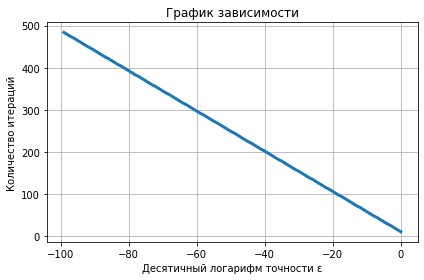

In [149]:
reference_points = [(math.log10(10 ** (-1 * p)), fib_extr(INTERVAL_START, INTERVAL_END, (10 ** (-1 * p)))[1]) for p in range(100)]

fig = plt.figure()
plt.title('График зависимости')
plt.xlabel('Десятичный логарифм точности ε')
plt.ylabel('Количество итераций')
plt.plot([point[0] for point in reference_points], [point[1] for point in reference_points], lw=3)
plt.tight_layout()
plt.grid()
plt.show()